In [1]:
#Import required modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
#Define functions

#Function for calculating electric field of coils
def Bc(x, mu0, n, R):
    field = np.zeros(14)
    for i in range(0, len(field)):
        field[i] = ((4/5)**(3/2))*((mu0*n*x[i])/R)
    return field

#Function for calculating error in electric field from coils
def Bc_err(field, current, Radius, current_err, Radius_err):
    field_error = np.zeros(14)
    for i in range(0, len(field_error)):
        field_error[i] = field[i]*np.sqrt((current_err[i]/current[i])**2 + (Radius_err/Radius)**2)
    return field_error

#Function for calculating error in 1/r
def r_err(inverse_radius, radius, radius_error):
    inverse_rad_err = np.zeros(14)
    for i in range(0, len(inverse_rad_err)):
        inverse_rad_err[i] = inverse_radius[i]*(radius_error[i]/radius[i])
    return inverse_rad_err

#Define linear model function, x = Bc, a = sqrt(e/2m)1/sqrt(V), b=Be
def model_linear(x,a,b): 
    return a*x + b

In [3]:
#Define constants
mu0 = (4*np.pi)*(10**(-7)) #Permeability constant
n = 130                    #Number of turns
R = 0.16025                #Radius of coils in metres
R_err = 0.005              #Uncertainty in radius

In [4]:
#Load experimental data from .txt files 
current_211, current_err_211, inv_rad_211, rad_err_211, radius_211 = np.loadtxt('211V.txt', comments='#', skiprows=1, unpack=True)
current_195, current_err_195, inv_rad_195, rad_err_195, radius_195 = np.loadtxt('195V.txt', comments='#', skiprows=1, unpack=True)
current_180, current_err_180, inv_rad_180, rad_err_180, radius_180 = np.loadtxt('180V.txt', comments='#', skiprows=1, unpack=True)
current_165, current_err_165, inv_rad_165, rad_err_165, radius_165 = np.loadtxt('165V.txt', comments='#', skiprows=1, unpack=True)
current_150, current_err_150, inv_rad_150, rad_err_150, radius_150 = np.loadtxt('150V.txt', comments='#', skiprows=1, unpack=True)
current_135, current_err_135, inv_rad_135, rad_err_135, radius_135 = np.loadtxt('135V.txt', comments='#', skiprows=1, unpack=True)
current_120, current_err_120, inv_rad_120, rad_err_120, radius_120 = np.loadtxt('120V.txt', comments='#', skiprows=1, unpack=True)

The value for constant a from this fit is 27943.67907212762 and the value for Be from this fit is -1.4018597426692203 .

The charge to mass ratio of an electron from this fit is 329518362436.3186 .


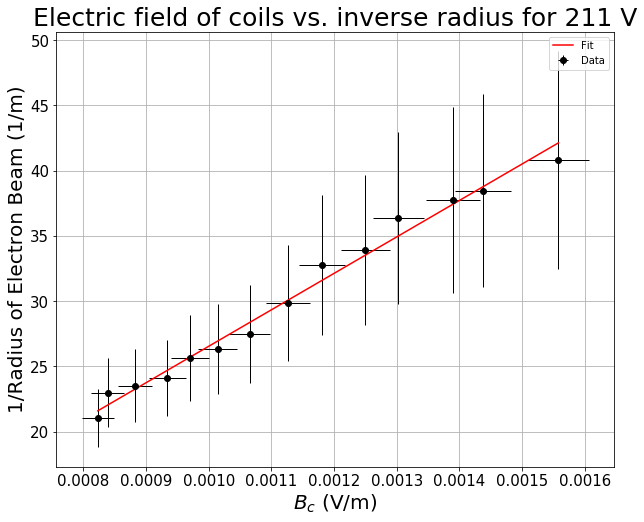

In [6]:
#211V
#Calculate functions for 211V
Bc_211 = Bc(current_211, mu0, n, R)
Bc_211_err = Bc_err(Bc_211, current_211, R, current_err_211, R_err)
inv_err_211 = r_err(inv_rad_211, radius_211, rad_err_211)

#Curve fit for 211V
p_opt, p_cov = curve_fit(model_linear, Bc_211, inv_rad_211, p0=(1,0), sigma=Bc_211_err, absolute_sigma=True)
p_opt_211 = p_opt
p_cov_211 = p_cov

#Plot for 211V
plt.figure(figsize=(10,8))
plt.errorbar(Bc_211, inv_rad_211, xerr = Bc_211_err, yerr = inv_err_211, ls='', marker='o', lw=1, color='k', label='Data')
plt.plot(Bc_211, model_linear(Bc_211,*p_opt_211), color='r', label='Fit')
plt.title('Electric field of coils vs. inverse radius for 211 V', fontsize=25)
plt.xlabel('$B_c$ (V/m)', fontsize=20)
plt.ylabel('1/Radius of Electron Beam (1/m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()

print("The value for constant a from this fit is", p_opt_211[0], "and the value for Be from this fit is", p_opt_211[1], ".")
e_m_ratio_211 = 2*(p_opt_211[0]*np.sqrt(211))**2
print()
print("The charge to mass ratio of an electron from this fit is", e_m_ratio_211,".")

The value for constant a from this fit is 32202.58745452867 and the value for Be from this fit is -2.3030305326064866 .

The charge to mass ratio of an electron from this fit is 404432589118.9613 .


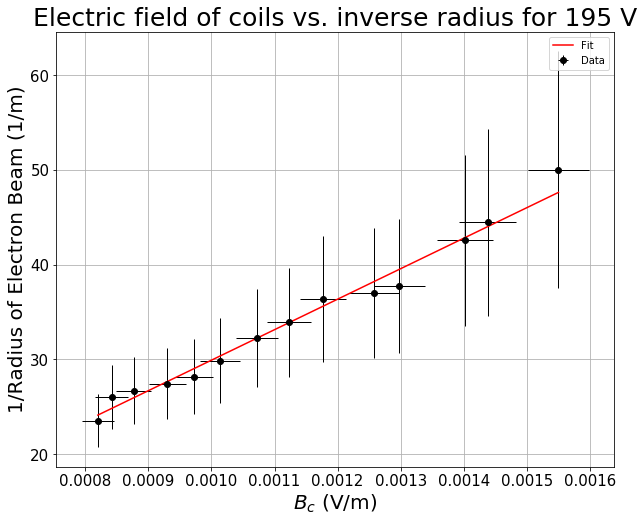

In [7]:
#195V
#Calculate functions for 195V
Bc_195 = Bc(current_195, mu0, n, R)
Bc_195_err = Bc_err(Bc_195, current_195, R, current_err_195, R_err)
inv_err_195 = r_err(inv_rad_195, radius_195, rad_err_195)

#Curve fit for 211V
p_opt, p_cov = curve_fit(model_linear, Bc_195, inv_rad_195, p0=(1,0), sigma=Bc_195_err, absolute_sigma=True)
p_opt_195 = p_opt
p_cov_195 = p_cov

#Plot for 195V
plt.figure(figsize=(10,8))
plt.errorbar(Bc_195, inv_rad_195, xerr = Bc_195_err, yerr = inv_err_195, ls='', marker='o', lw=1, color='k', label='Data')
plt.plot(Bc_195, model_linear(Bc_195,*p_opt_195), color='r', label='Fit')
plt.title('Electric field of coils vs. inverse radius for 195 V', fontsize=25)
plt.xlabel('$B_c$ (V/m)', fontsize=20)
plt.ylabel('1/Radius of Electron Beam (1/m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()

print("The value for constant a from this fit is", p_opt_195[0], "and the value for Be from this fit is", p_opt_195[1], ".")
e_m_ratio_195 = 2*(p_opt_195[0]*np.sqrt(195))**2
print()
print("The charge to mass ratio of an electron from this fit is", e_m_ratio_195,".")

The value for constant a from this fit is 32943.91443610479 and the value for Be from this fit is -0.9594443608259988 .

The charge to mass ratio of an electron from this fit is 390708539414.42163 .


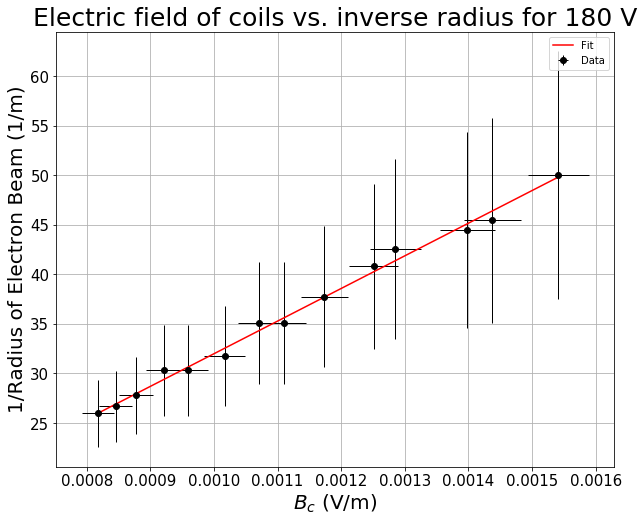

In [8]:
#180V
#Calculate functions for 180V
Bc_180 = Bc(current_180, mu0, n, R)
Bc_180_err = Bc_err(Bc_180, current_180, R, current_err_180, R_err)
inv_err_180 = r_err(inv_rad_180, radius_180, rad_err_180)

#Curve fit for 211V
p_opt, p_cov = curve_fit(model_linear, Bc_180, inv_rad_180, p0=(1,0), sigma=Bc_180_err, absolute_sigma=True)
p_opt_180 = p_opt
p_cov_180 = p_cov

#Plot for 180V
plt.figure(figsize=(10,8))
plt.errorbar(Bc_180, inv_rad_180, xerr = Bc_180_err, yerr = inv_err_180, ls='', marker='o', lw=1, color='k', label='Data')
plt.plot(Bc_180, model_linear(Bc_180,*p_opt_180), color='r', label='Fit')
plt.title('Electric field of coils vs. inverse radius for 180 V', fontsize=25)
plt.xlabel('$B_c$ (V/m)', fontsize=20)
plt.ylabel('1/Radius of Electron Beam (1/m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()

print("The value for constant a from this fit is", p_opt_180[0], "and the value for Be from this fit is", p_opt_180[1], ".")
e_m_ratio_180 = 2*(p_opt_180[0]*np.sqrt(180))**2
print()
print("The charge to mass ratio of an electron from this fit is", e_m_ratio_180,".")

The value for constant a from this fit is 29194.539083213287 and the value for Be from this fit is 4.774721434429146 .

The charge to mass ratio of an electron from this fit is 281265967052.8185 .


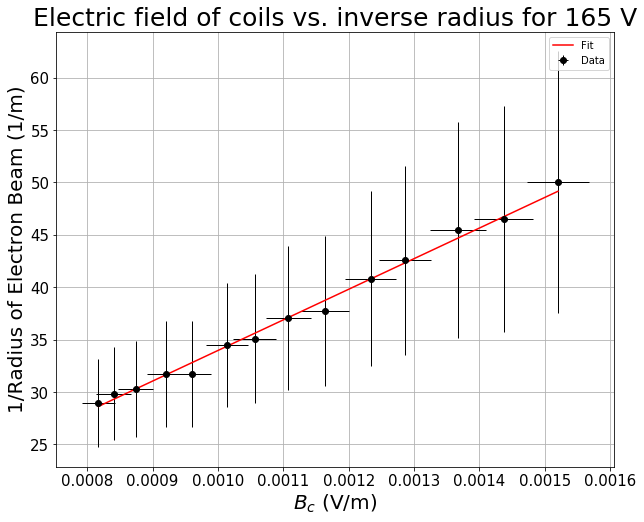

In [9]:
#165V
#Calculate functions for 165V
Bc_165 = Bc(current_165, mu0, n, R)
Bc_165_err = Bc_err(Bc_165, current_165, R, current_err_165, R_err)
inv_err_165 = r_err(inv_rad_165, radius_165, rad_err_165)

#Curve fit for 165V
p_opt, p_cov = curve_fit(model_linear, Bc_165, inv_rad_165, p0=(1,0), sigma=Bc_165_err, absolute_sigma=True)
p_opt_165 = p_opt
p_cov_165 = p_cov

#Plot for 211V
plt.figure(figsize=(10,8))
plt.errorbar(Bc_165, inv_rad_165, xerr = Bc_165_err, yerr = inv_err_165, ls='', marker='o', lw=1, color='k', label='Data')
plt.plot(Bc_165, model_linear(Bc_165,*p_opt_165), color='r', label='Fit')
plt.title('Electric field of coils vs. inverse radius for 165 V', fontsize=25)
plt.xlabel('$B_c$ (V/m)', fontsize=20)
plt.ylabel('1/Radius of Electron Beam (1/m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.grid()

print("The value for constant a from this fit is", p_opt_165[0], "and the value for Be from this fit is", p_opt_165[1], ".")
e_m_ratio_165 = 2*(p_opt_165[0]*np.sqrt(165))**2
print()
print("The charge to mass ratio of an electron from this fit is", e_m_ratio_165,".")

The value for constant a from this fit is 35930.972851005994 and the value for Be from this fit is 1.2805495924086805 .

The charge to mass ratio of an electron from this fit is 387310443005.91895 .


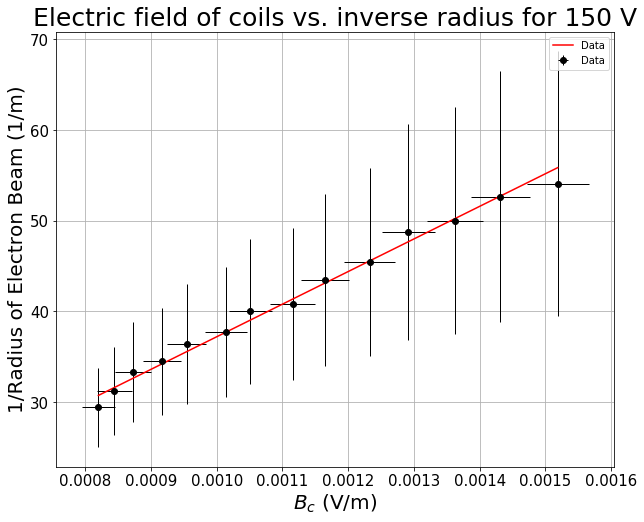

In [10]:
#150V
#Calculate functions for 150V
Bc_150 = Bc(current_150, mu0, n, R)
Bc_150_err = Bc_err(Bc_150, current_150, R, current_err_150, R_err)
inv_err_150 = r_err(inv_rad_150, radius_150, rad_err_150)

#Curve fit for 150V
p_opt, p_cov = curve_fit(model_linear, Bc_150, inv_rad_150, p0=(1,0), sigma=Bc_150_err, absolute_sigma=True)
p_opt_150 = p_opt
p_cov_150 = p_cov

#Plot for 150V
plt.figure(figsize=(10,8))
plt.errorbar(Bc_150, inv_rad_150, xerr = Bc_150_err, yerr = inv_err_150, ls='', marker='o', lw=1, color='k', label='Data')
plt.plot(Bc_150, model_linear(Bc_150,*p_opt_150), color='r', label='Data')
plt.title('Electric field of coils vs. inverse radius for 150 V', fontsize=25)
plt.xlabel('$B_c$ (V/m)', fontsize=20)
plt.ylabel('1/Radius of Electron Beam (1/m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()

print("The value for constant a from this fit is", p_opt_150[0], "and the value for Be from this fit is", p_opt_150[1], ".")
e_m_ratio_150 = 2*(p_opt_150[0]*np.sqrt(150))**2
print()
print("The charge to mass ratio of an electron from this fit is", e_m_ratio_150,".")

The value for constant a from this fit is 41308.30396533456 and the value for Be from this fit is -0.5226596014923948 .

The charge to mass ratio of an electron from this fit is 460721513652.9682 .


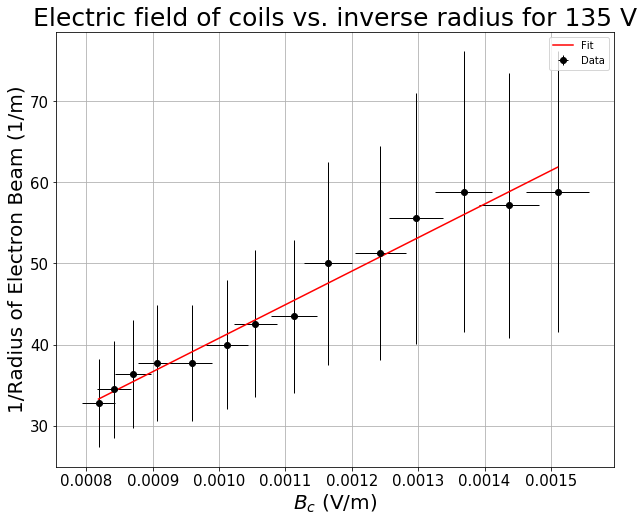

In [12]:
#135V
#Calculate functions for 135V
Bc_135 = Bc(current_135, mu0, n, R)
Bc_135_err = Bc_err(Bc_135, current_135, R, current_err_135, R_err)
inv_err_135 = r_err(inv_rad_135, radius_135, rad_err_135)

#Curve fit for 135V
p_opt, p_cov = curve_fit(model_linear, Bc_135, inv_rad_135, p0=(1,0), sigma=Bc_135_err, absolute_sigma=True)
p_opt_135 = p_opt
p_cov_135 = p_cov

#Plot for 135V
plt.figure(figsize=(10,8))
plt.errorbar(Bc_135, inv_rad_135, xerr = Bc_135_err, yerr = inv_err_135, ls='', marker='o', lw=1, color='k', label='Data')
plt.plot(Bc_135, model_linear(Bc_135,*p_opt_135), color='r', label='Fit')
plt.title('Electric field of coils vs. inverse radius for 135 V', fontsize=25)
plt.xlabel('$B_c$ (V/m)', fontsize=20)
plt.ylabel('1/Radius of Electron Beam (1/m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()

print("The value for constant a from this fit is", p_opt_135[0], "and the value for Be from this fit is", p_opt_135[1], ".")
e_m_ratio_135 = 2*(p_opt_135[0]*np.sqrt(135))**2
print()
print("The charge to mass ratio of an electron from this fit is", e_m_ratio_135,".")

The value for constant a from this fit is 44083.10071489773 and the value for Be from this fit is 3.309490357510409 .

The charge to mass ratio of an electron from this fit is 466396744473.55597 .


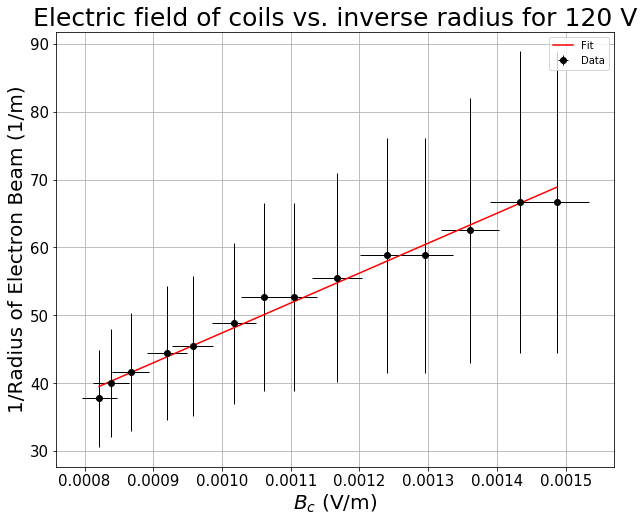

In [14]:
#120V
#Calculate functions for 120V
Bc_120 = Bc(current_120, mu0, n, R)
Bc_120_err = Bc_err(Bc_120, current_120, R, current_err_120, R_err)
inv_err_120 = r_err(inv_rad_120, radius_120, rad_err_120)

#Curve fit for 120V
p_opt, p_cov = curve_fit(model_linear, Bc_120, inv_rad_120, p0=(1,0), sigma=Bc_120_err, absolute_sigma=True)
p_opt_120 = p_opt
p_cov_120 = p_cov

#Plot for 120V
plt.figure(figsize=(10,8))
plt.errorbar(Bc_120, inv_rad_120, xerr = Bc_120_err, yerr = inv_err_120, ls='', marker='o', lw=1, color='k', label='Data')
plt.plot(Bc_120, model_linear(Bc_120,*p_opt_120), color='r', label='Fit')
plt.title('Electric field of coils vs. inverse radius for 120 V', fontsize=25)
plt.xlabel('$B_c$ (V/m)', fontsize=20)
plt.ylabel('1/Radius of Electron Beam (1/m)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend()

print("The value for constant a from this fit is", p_opt_120[0], "and the value for Be from this fit is", p_opt_120[1], ".")
e_m_ratio_120 = 2*(p_opt_120[0]*np.sqrt(120))**2
print()
print("The charge to mass ratio of an electron from this fit is", e_m_ratio_120,".")

In [16]:
#Compute the value for Be based on the fits
Be_array = np.array([p_opt_211[1], p_opt_195[1], p_opt_180[1], p_opt_165[1], p_opt_150[1], p_opt_135[1], p_opt_120[1]])
Be_avg = np.mean(Be_array)
Be_std = np.std(Be_array)
Be_standard_err = Be_std/np.sqrt(len(Be_array))
print("The average value for Be based on these fits is", Be_avg, "+/-", Be_standard_err, ".")

The average value for Be based on these fits is 0.5968238781077336 +/- 0.9187388670312565 .


In [17]:
#Compute the value for the charge-to-mass ratio based on the fits
e_m_array = np.array([e_m_ratio_211, e_m_ratio_195, e_m_ratio_180, e_m_ratio_165, e_m_ratio_150, e_m_ratio_135, e_m_ratio_120])
e_m_avg = np.mean(e_m_array)
e_m_std = np.std(e_m_array)
e_m_standard_err = e_m_std/np.sqrt(len(e_m_array))
print("The average value for the charge to mass ratio of the electron based on these fits is", e_m_avg, "+/-", e_m_standard_err, ".")

The average value for the charge to mass ratio of the electron based on these fits is 388622022736.42334 +/- 23265046519.029823 .
